### Import Libraries


In [36]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import pandas as pd
import zipfile
import pathlib

import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,Flatten, Dropout


### Get data

In [2]:
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/data/data.zip','r')
zip_ref.extractall()
zip_ref.close()

In [3]:
!ls data

test  train


In [4]:
# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'data'.
There are 5 directories and 0 images in 'data/train'.
There are 0 directories and 609 images in 'data/train/smarttv'.
There are 0 directories and 609 images in 'data/train/laptops'.
There are 0 directories and 640 images in 'data/train/mobiles'.
There are 0 directories and 690 images in 'data/train/headphones'.
There are 0 directories and 567 images in 'data/train/camera'.
There are 5 directories and 0 images in 'data/test'.
There are 0 directories and 261 images in 'data/test/smarttv'.
There are 0 directories and 261 images in 'data/test/laptops'.
There are 0 directories and 275 images in 'data/test/mobiles'.
There are 0 directories and 297 images in 'data/test/headphones'.
There are 0 directories and 244 images in 'data/test/camera'.


In [5]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
data_dir = pathlib.Path("data/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['camera' 'headphones' 'laptops' 'mobiles' 'smarttv']


In [6]:
def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img);
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (198, 312, 3)


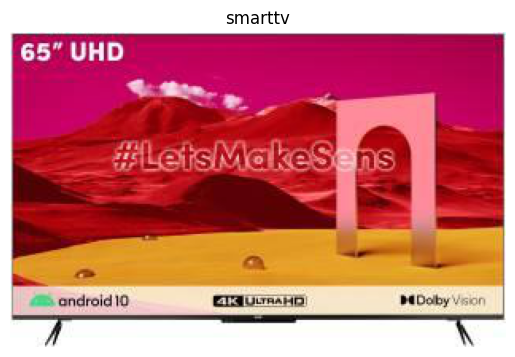

In [7]:
# View a random image from the training dataset
img = view_random_image(target_dir="data/train/",
                        target_class="smarttv")

Image shape: (612, 593, 3)


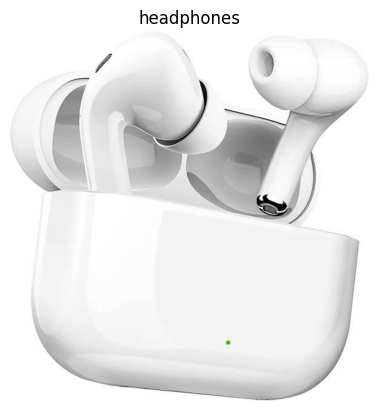

In [8]:
img2 = view_random_image(target_dir="data/train/",
                        target_class="headphones")

In [9]:
img

array([[[254, 255, 248],
        [242, 243, 238],
        [248, 242, 244],
        ...,
        [255, 227, 248],
        [211, 236, 233],
        [213, 255, 255]],

       [[254, 225, 229],
        [169, 134, 141],
        [115,  66,  85],
        ...,
        [137,  84, 110],
        [128, 142, 143],
        [193, 247, 233]],

       [[255, 239, 249],
        [168, 109, 127],
        [104,  19,  52],
        ...,
        [ 96,  21,  54],
        [118, 111, 119],
        [226, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [10]:
# Check shape
img.shape

(198, 312, 3)

In [11]:
img.min(), img.max()

(0, 255)

In [12]:
# Get all the pixel values between 0 & 1
img/255. 

array([[[0.99607843, 1.        , 0.97254902],
        [0.94901961, 0.95294118, 0.93333333],
        [0.97254902, 0.94901961, 0.95686275],
        ...,
        [1.        , 0.89019608, 0.97254902],
        [0.82745098, 0.9254902 , 0.91372549],
        [0.83529412, 1.        , 1.        ]],

       [[0.99607843, 0.88235294, 0.89803922],
        [0.6627451 , 0.5254902 , 0.55294118],
        [0.45098039, 0.25882353, 0.33333333],
        ...,
        [0.5372549 , 0.32941176, 0.43137255],
        [0.50196078, 0.55686275, 0.56078431],
        [0.75686275, 0.96862745, 0.91372549]],

       [[1.        , 0.9372549 , 0.97647059],
        [0.65882353, 0.42745098, 0.49803922],
        [0.40784314, 0.0745098 , 0.20392157],
        ...,
        [0.37647059, 0.08235294, 0.21176471],
        [0.4627451 , 0.43529412, 0.46666667],
        [0.88627451, 1.        , 1.        ]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

In [13]:
# Set the seed
tf.random.set_seed(42)

# Preprocess data (scaling down between 0 & 1)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# train and test directoris path
train_dir = "data/train/"
test_dir = "data/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='categorical',
                                               seed=42)
test_data = test_datagen.flow_from_directory(test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode='categorical',
                                             seed=42)

Found 3115 images belonging to 5 classes.
Found 1338 images belonging to 5 classes.


In [14]:
# Create a cnn model for baseline
baseline_model = Sequential([
    # Convolutional layer block 1
    Conv2D(filters=10, kernel_size=(3,3), activation='relu', input_shape=(224,224,3)),
    Conv2D(filters=10, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),

    # Convolutional layer block 2
    Conv2D(filters=10, kernel_size=(3,3), activation='relu'),
    Conv2D(filters=10, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),

    Flatten(),
    Dense(len(class_names), activation='softmax')
])


In [15]:
# Summary
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [16]:
# Compile model
baseline_model.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [17]:
# baseline history
baseline_history = baseline_model.fit(train_data,
                                      epochs=5,
                                      steps_per_epoch=len(train_data),
                                      validation_data=test_data,
                                      validation_steps=len(test_data))

Epoch 1/5
98/98 [==============================] - 26s 152ms/step - loss: 0.5996 - accuracy: 0.7791 - val_loss: 0.2599 - val_accuracy: 0.9185
Epoch 2/5
98/98 [==============================] - 14s 141ms/step - loss: 0.1713 - accuracy: 0.9435 - val_loss: 0.1977 - val_accuracy: 0.9305
Epoch 3/5
98/98 [==============================] - 14s 140ms/step - loss: 0.0586 - accuracy: 0.9836 - val_loss: 0.1761 - val_accuracy: 0.9432
Epoch 4/5
98/98 [==============================] - 14s 141ms/step - loss: 0.0182 - accuracy: 0.9949 - val_loss: 0.2156 - val_accuracy: 0.9395
Epoch 5/5
98/98 [==============================] - 14s 143ms/step - loss: 0.0093 - accuracy: 0.9981 - val_loss: 0.2328 - val_accuracy: 0.9402


In [18]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

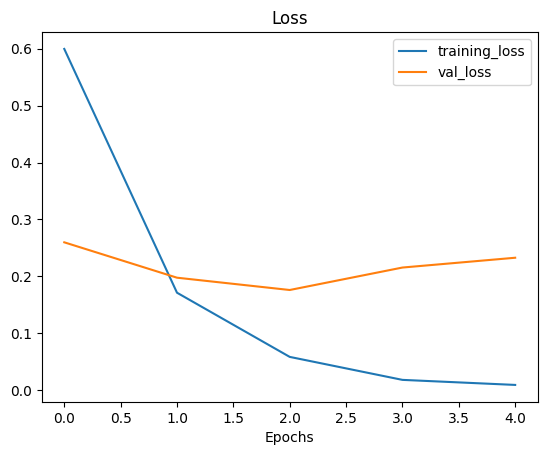

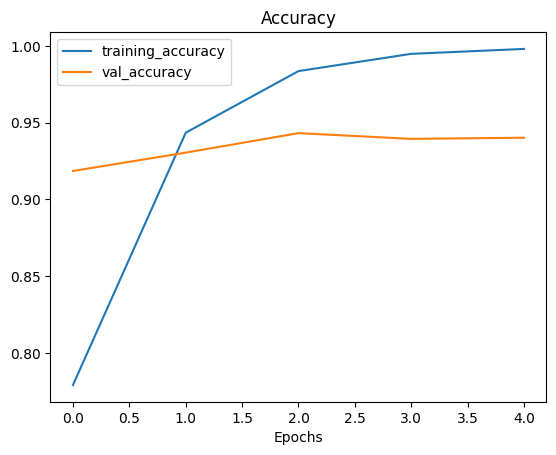

In [19]:
# plot loss curves for baseline
plot_loss_curves(baseline_history)

Our model is overfitting.
We can use one of the technique to reduce overfitting. It is data augmentation 

In [20]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                             rotation_range=25,
                                             width_shift_range=0.4,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode='categorical')

Found 3115 images belonging to 5 classes.


In [21]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

In [22]:
# Clone the model (use the same architecture)
model_1 = tf.keras.models.clone_model(baseline_model)

# Compile the cloned model (same setup as used for model_10)
model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
98/98 [==============================] - 49s 484ms/step - loss: 1.3392 - accuracy: 0.4254 - val_loss: 1.1347 - val_accuracy: 0.6046
Epoch 2/5
98/98 [==============================] - 45s 458ms/step - loss: 1.1290 - accuracy: 0.5644 - val_loss: 1.0545 - val_accuracy: 0.6398
Epoch 3/5
98/98 [==============================] - 45s 458ms/step - loss: 1.1182 - accuracy: 0.5660 - val_loss: 1.1303 - val_accuracy: 0.6024
Epoch 4/5
98/98 [==============================] - 46s 474ms/step - loss: 1.0486 - accuracy: 0.5994 - val_loss: 0.9937 - val_accuracy: 0.6106
Epoch 5/5
98/98 [==============================] - 45s 462ms/step - loss: 0.9914 - accuracy: 0.6289 - val_loss: 0.7956 - val_accuracy: 0.7212


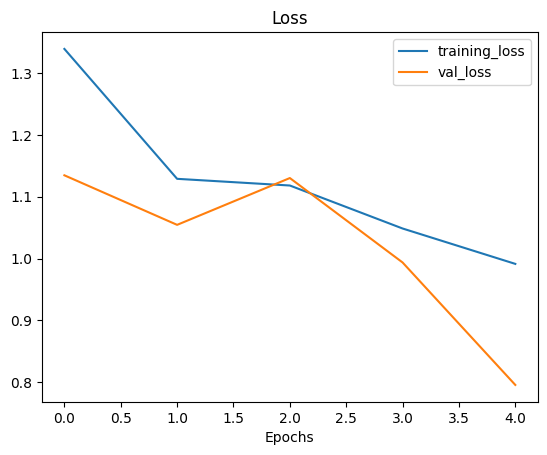

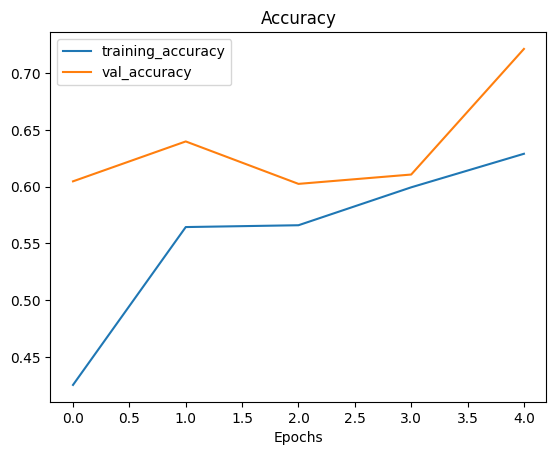

In [23]:
# Check out our model's performance with augmented data
plot_loss_curves(history_1)

In [24]:
class_names

array(['camera', 'headphones', 'laptops', 'mobiles', 'smarttv'],
      dtype='<U10')

In [38]:
# Create our custom cnn architecture
custom_model = Sequential([
    # convoultional layer 1
    Conv2D(filters=16, kernel_size=(7, 7), strides=(5,5), padding='same', activation='relu', input_shape=(224,224,3)),
    Conv2D(filters=32, kernel_size=(7, 7), strides=(5,5), padding='same', activation='relu'),
    MaxPool2D(pool_size=(1,1)),

    # convolutional layer 2
    Conv2D(filters=64, kernel_size=(5,5), strides=(3,3), padding='same', activation='relu', input_shape=(224,224,3)),
    Conv2D(filters=64, kernel_size=(5,5), strides=(3,3), padding='same', activation='relu'),
    MaxPool2D(pool_size=(1,1)),
    Dropout(0.3),

    # convolutional layer 3
    Conv2D(filters=128, kernel_size=(5,5), strides=(2,2), padding='same', activation='relu', input_shape=(224,224,3)),
    Conv2D(filters=128, kernel_size=(5,5), strides=(2,2), padding='same', activation='relu'),
    MaxPool2D(pool_size=(1,1)),
    Dropout(0.3),

    # convolutional layer 4
    Conv2D(filters=64, kernel_size=(5,5), strides=(2,2), padding='same', activation='relu', input_shape=(224,224,3)),
    Conv2D(filters=64, kernel_size=(5,5), strides=(2,2), padding='same', activation='relu'),
    MaxPool2D(pool_size=(1,1)),
    Dropout(0.3),

    #Flatten
    Flatten(),

    # Dense
    Dense(128, activation='relu'),
    Dropout(0.4),

    # Output layer
    Dense(len(class_names), activation='softmax')   
])

In [39]:
# Summary 
custom_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_67 (Conv2D)          (None, 45, 45, 16)        2368      
                                                                 
 conv2d_68 (Conv2D)          (None, 9, 9, 32)          25120     
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 9, 9, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_69 (Conv2D)          (None, 3, 3, 64)          51264     
                                                                 
 conv2d_70 (Conv2D)          (None, 1, 1, 64)          102464    
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 1, 1, 64)         0         
 g2D)                                                 

In [40]:
# Compile the custom model
custom_model.compile(loss='categorical_crossentropy',
                     optimizer='adam',
                     metrics=['accuracy'])

In [41]:
# Custom model history
custom_history = custom_model.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
98/98 [==============================] - 49s 457ms/step - loss: 1.6045 - accuracy: 0.2154 - val_loss: 1.6088 - val_accuracy: 0.2055
Epoch 2/5
98/98 [==============================] - 47s 480ms/step - loss: 1.5928 - accuracy: 0.2530 - val_loss: 1.5538 - val_accuracy: 0.2960
Epoch 3/5
98/98 [==============================] - 45s 455ms/step - loss: 1.4574 - accuracy: 0.3348 - val_loss: 1.3596 - val_accuracy: 0.3707
Epoch 4/5
98/98 [==============================] - 44s 455ms/step - loss: 1.3671 - accuracy: 0.3640 - val_loss: 1.2756 - val_accuracy: 0.3969
Epoch 5/5
98/98 [==============================] - 44s 447ms/step - loss: 1.4581 - accuracy: 0.3075 - val_loss: 1.4888 - val_accuracy: 0.2915


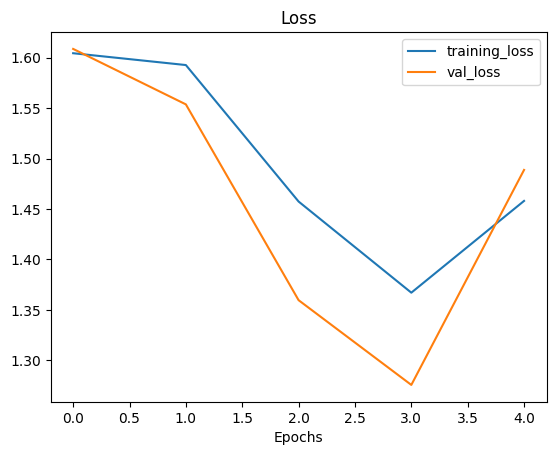

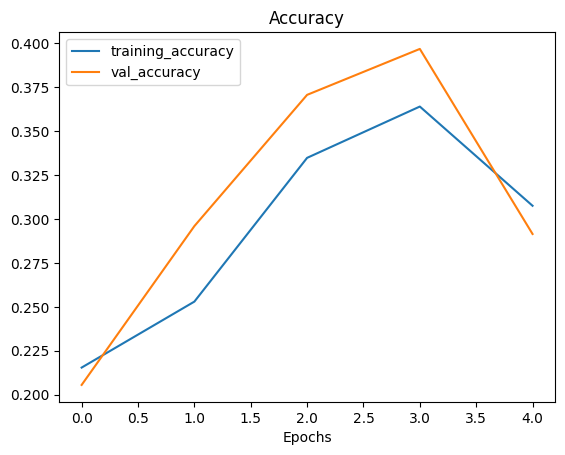

In [42]:
# plot loss curves
plot_loss_curves(custom_history)